In [3]:
import sqlite3
import pandas as pd


In [13]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('movies.db')

# Load data into a DataFrame
df = pd.read_sql_query("SELECT * FROM movies", conn)

# Close the database connection
conn.close()

# Display the first few rows of the DataFrame
print(df.head())


   id                                        title    genre         director  \
0   1              Devolved value-added task-force   Sci-Fi  Peter Rodriguez   
1   2  User-friendly web-enabled Internet solution   Sci-Fi        Ruth King   
2   3               Extended non-volatile encoding  Romance  Kimberly Archer   
3   4                Polarized 24/7 conglomeration   Comedy       Dawn Hobbs   
4   5               Automated high-level hierarchy   Action  Elizabeth Costa   

   release_year  duration  rating   votes  
0          2000        92     5.3  758304  
1          2008       163     2.7  314720  
2          2005       168     1.4  822684  
3          2015       119     4.3  853257  
4          2019        89     4.3  359518  


In [15]:
# Summary statistics
print(df.describe())


               id  release_year    duration      rating          votes
count  500.000000    500.000000  500.000000  500.000000     500.000000
mean   250.500000   2001.790000  127.312000    5.623600  493588.384000
std    144.481833     12.707039   29.136378    2.560296  292453.773563
min      1.000000   1980.000000   80.000000    1.100000    1936.000000
25%    125.750000   1990.750000  102.000000    3.400000  234182.000000
50%    250.500000   2002.000000  125.000000    5.700000  499572.000000
75%    375.250000   2014.000000  151.000000    7.700000  760886.250000
max    500.000000   2023.000000  180.000000   10.000000  999190.000000


In [17]:
# Count of movies per genre
genre_counts = df['genre'].value_counts()
print(genre_counts)


genre
Comedy     98
Action     92
Sci-Fi     85
Romance    78
Drama      74
Horror     73
Name: count, dtype: int64


In [19]:
# Average rating by genre
avg_rating_by_genre = df.groupby('genre')['rating'].mean()
print(avg_rating_by_genre)


genre
Action     5.830435
Comedy     5.712245
Drama      5.081081
Horror     5.961644
Romance    5.685897
Sci-Fi     5.422353
Name: rating, dtype: float64


In [21]:
# Movie with the highest rating
highest_rated_movie = df.loc[df['rating'].idxmax()]
print("Highest Rated Movie:\n", highest_rated_movie)

# Movie with the lowest rating
lowest_rated_movie = df.loc[df['rating'].idxmin()]
print("Lowest Rated Movie:\n", lowest_rated_movie)


Highest Rated Movie:
 id                                              24
title           Programmable multi-tasking project
genre                                      Romance
director                             Lisa Mcintyre
release_year                                  2018
duration                                       124
rating                                        10.0
votes                                         6778
Name: 23, dtype: object
Lowest Rated Movie:
 id                                              102
title           Vision-oriented human-resource core
genre                                        Sci-Fi
director                             Michael Kelley
release_year                                   1982
duration                                        128
rating                                          1.1
votes                                         49564
Name: 101, dtype: object


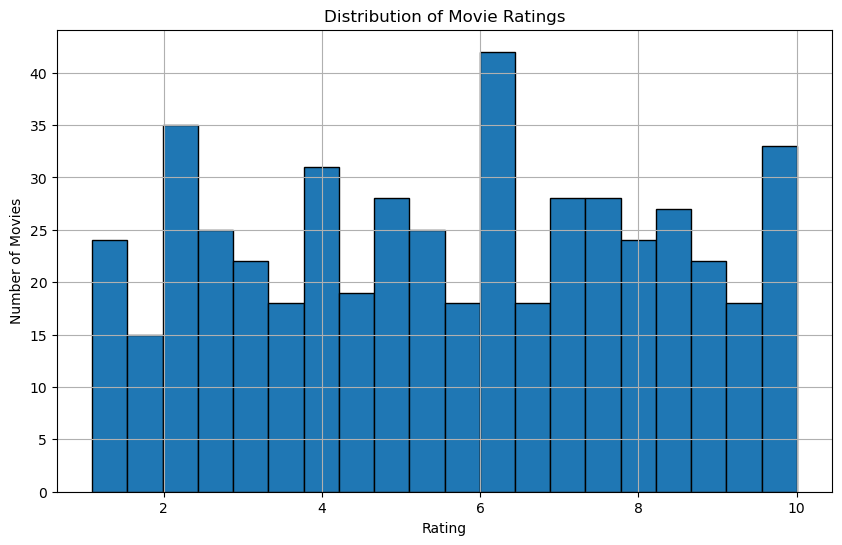

In [23]:
import matplotlib.pyplot as plt

# Histogram of movie ratings
plt.figure(figsize=(10, 6))
df['rating'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.show()


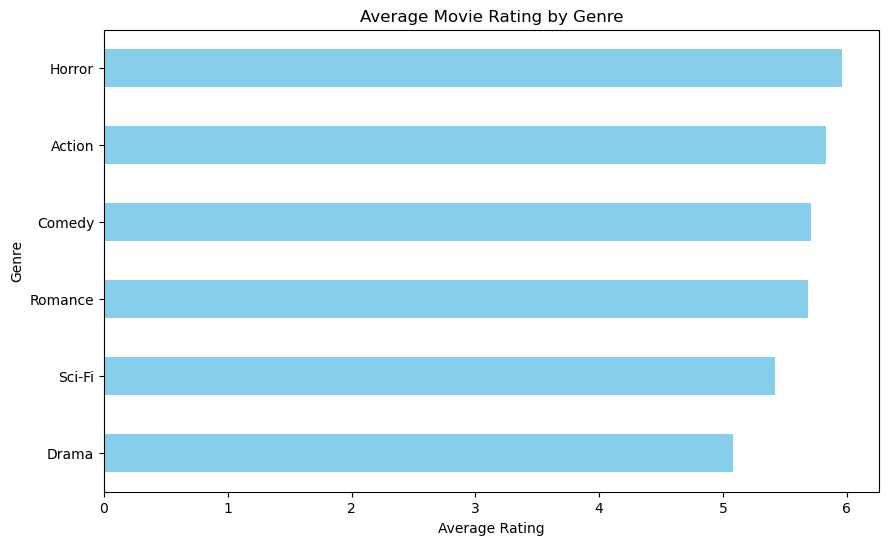

In [25]:
# Bar chart of average rating by genre
plt.figure(figsize=(10, 6))
avg_rating_by_genre.sort_values().plot(kind='barh', color='skyblue')
plt.title('Average Movie Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()
